<IPython.core.display.Javascript object>


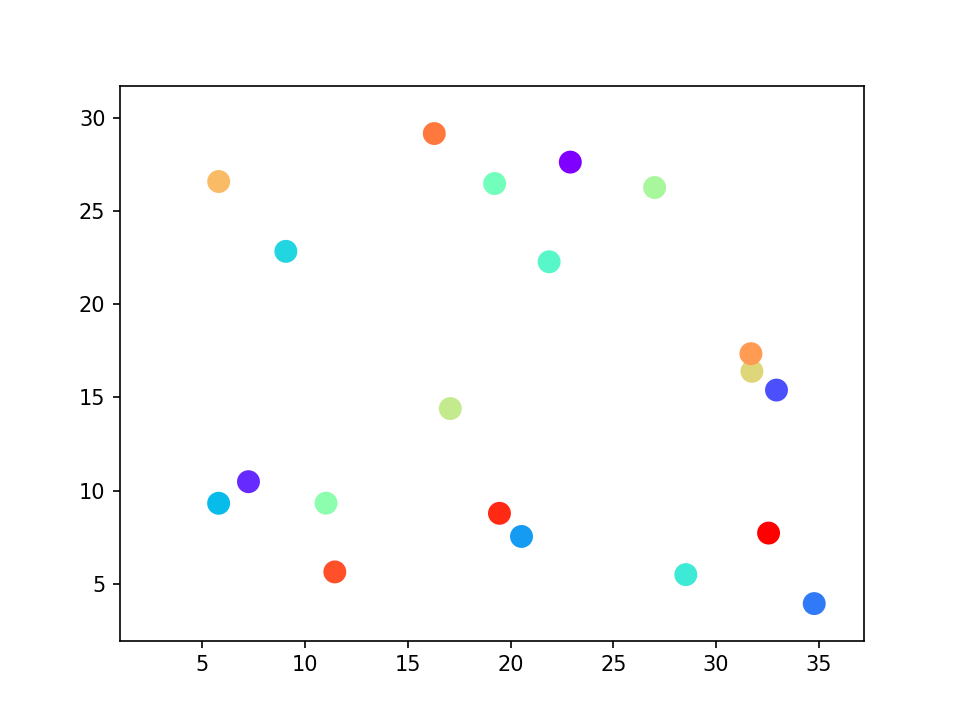

<IPython.core.display.Javascript object>


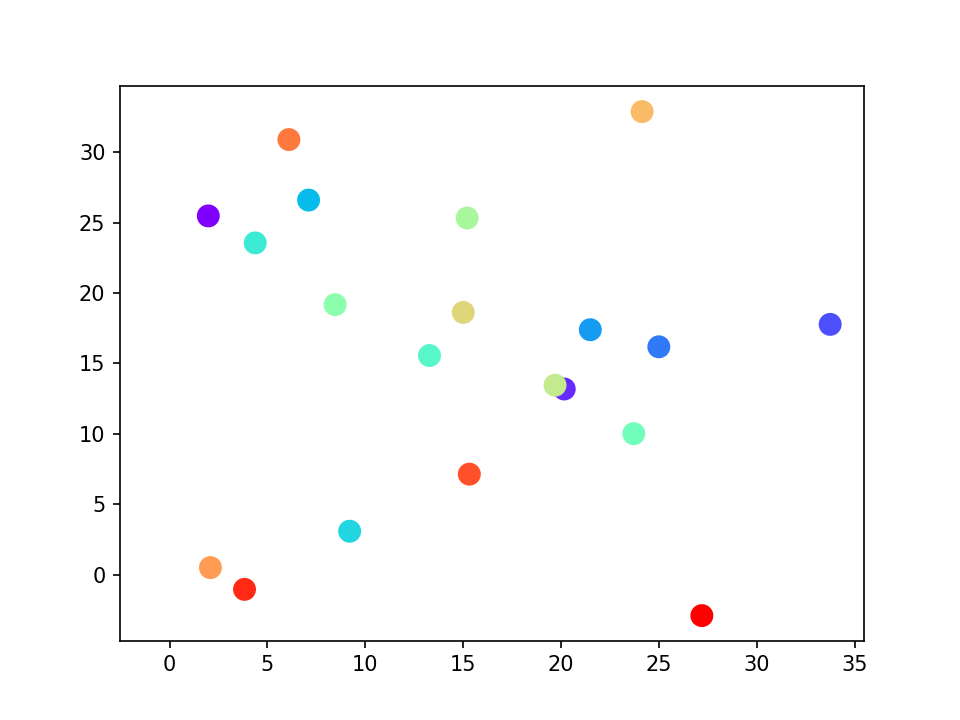

<IPython.core.display.Javascript object>


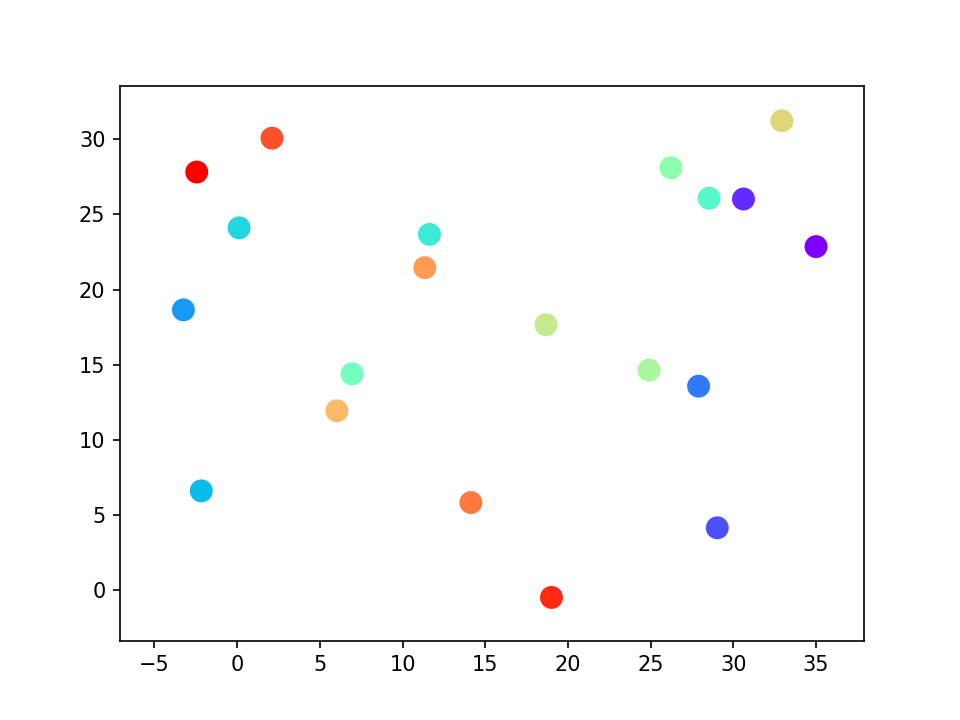

<IPython.core.display.Javascript object>


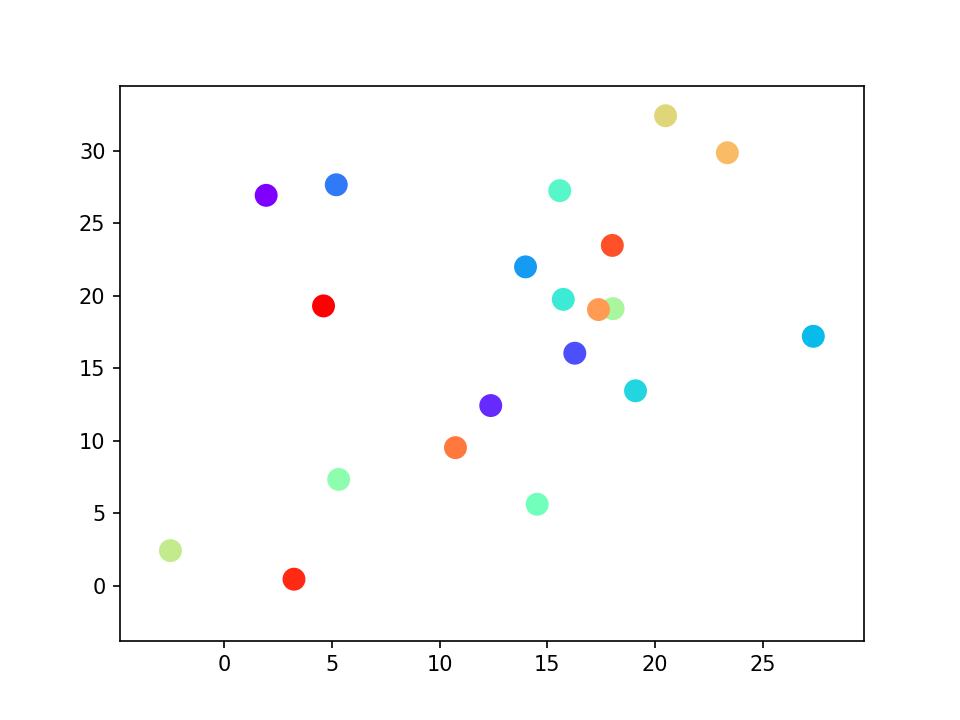

<IPython.core.display.Javascript object>


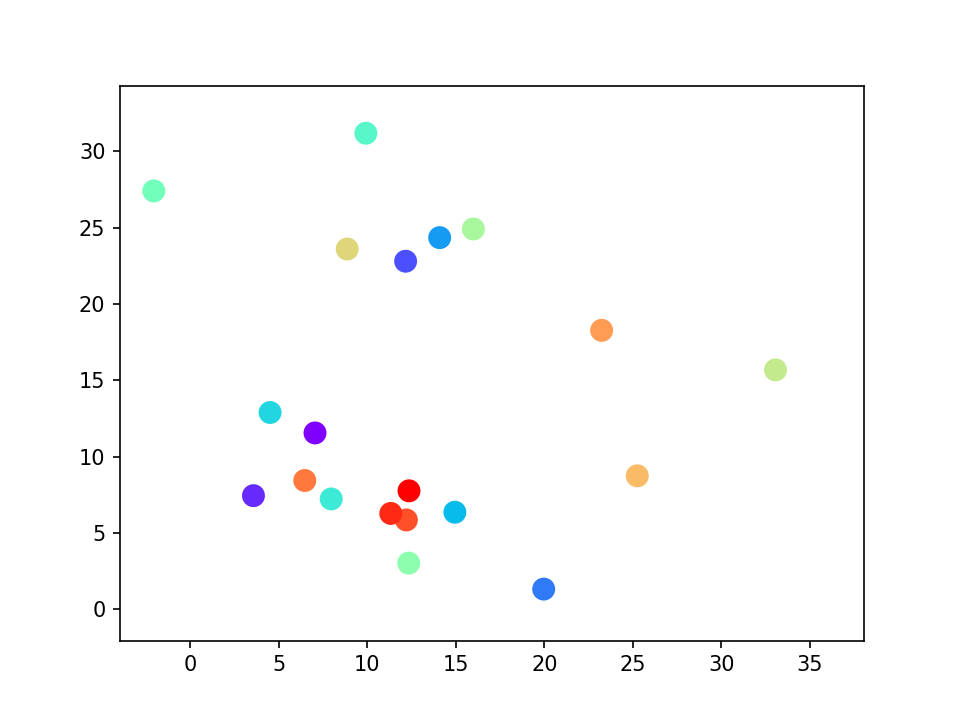

<IPython.core.display.Javascript object>


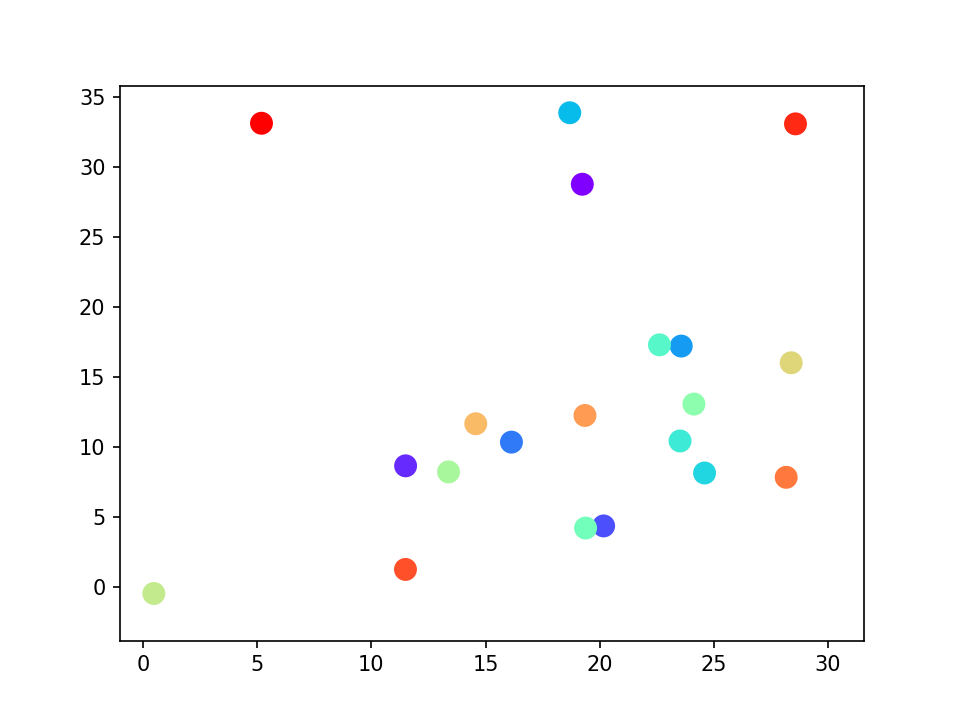

<IPython.core.display.Javascript object>


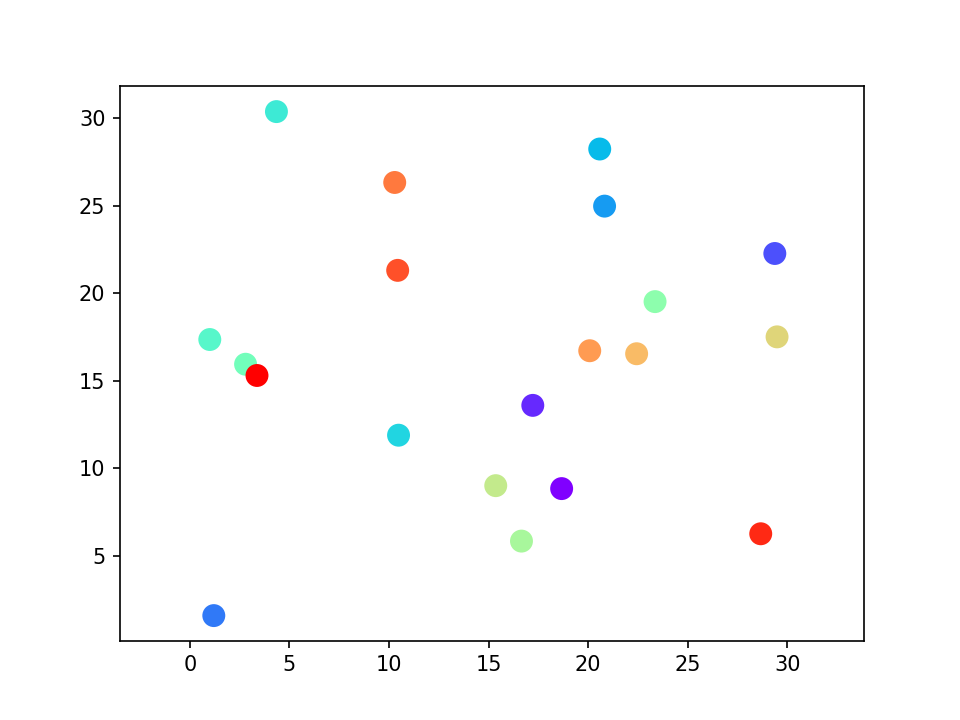

<IPython.core.display.Javascript object>


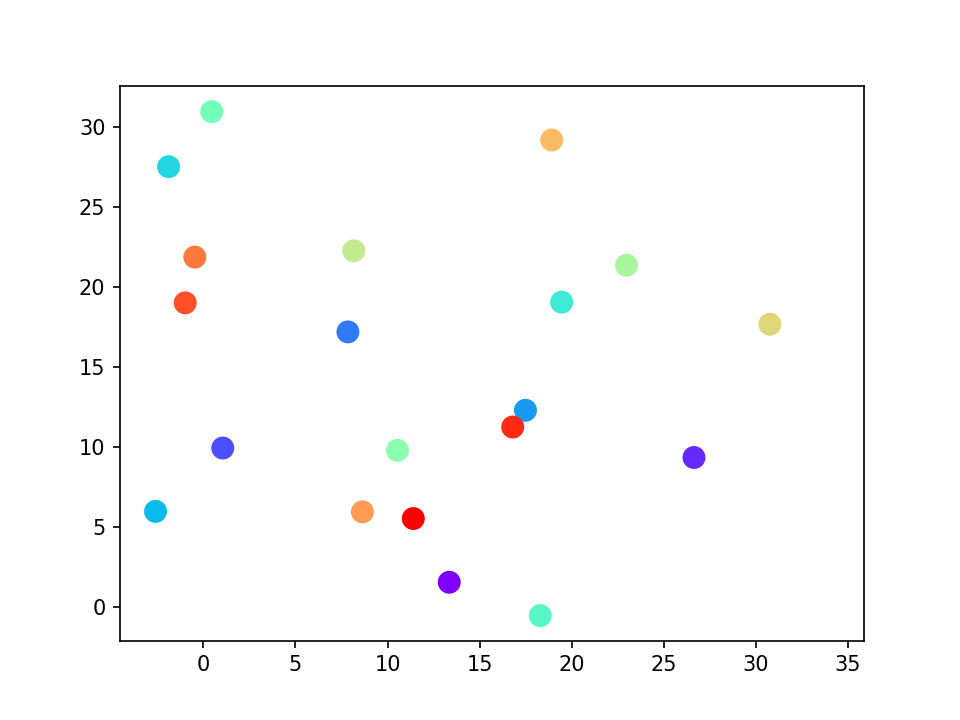

<IPython.core.display.Javascript object>


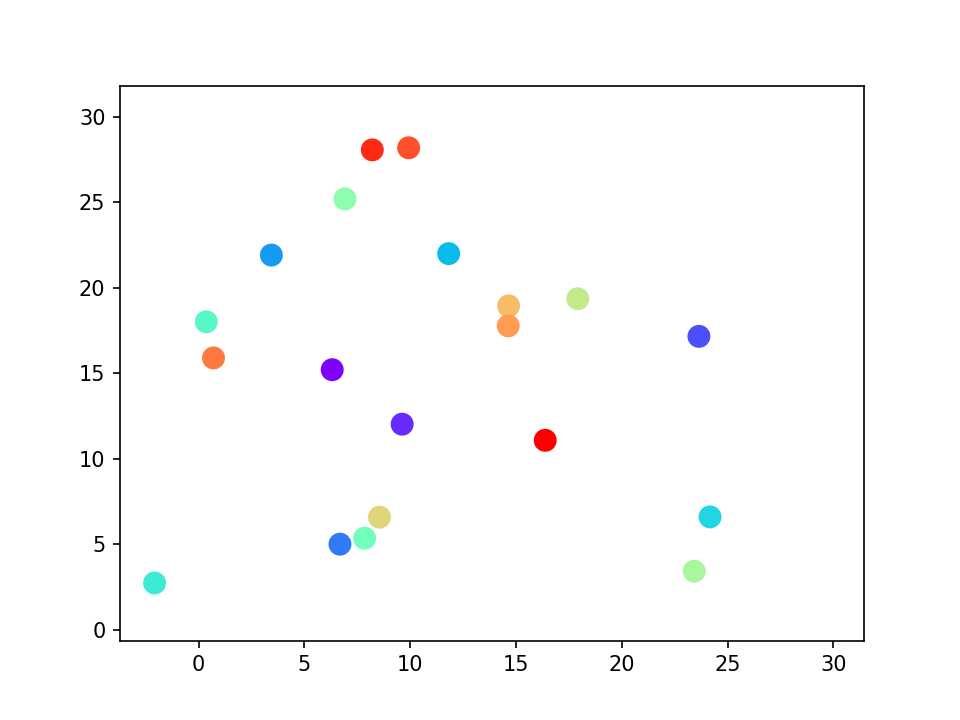

<IPython.core.display.Javascript object>


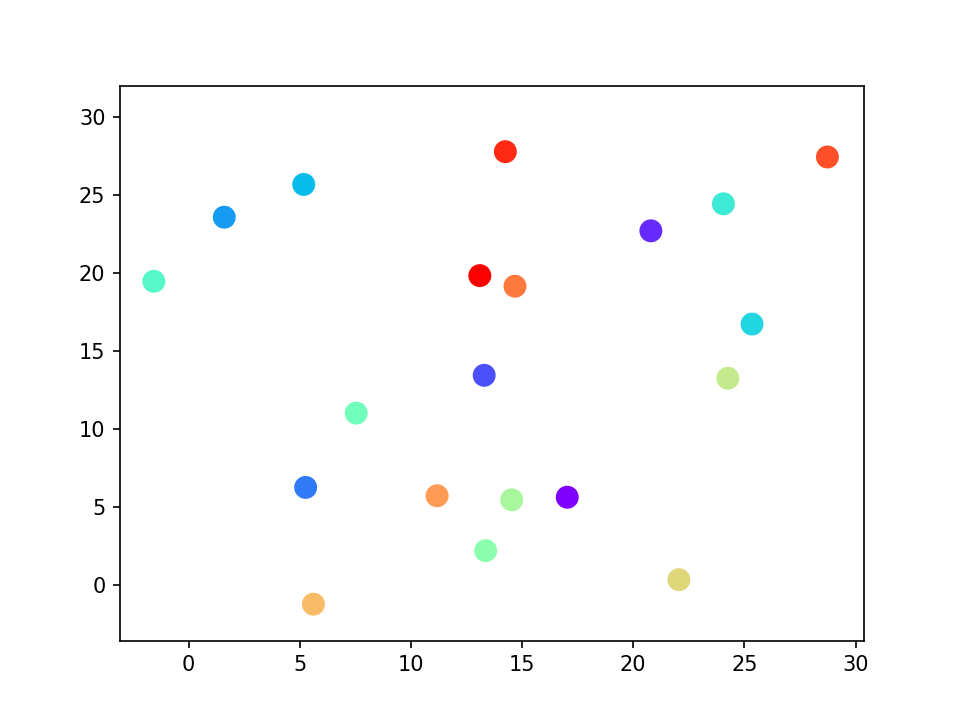

<IPython.core.display.Javascript object>


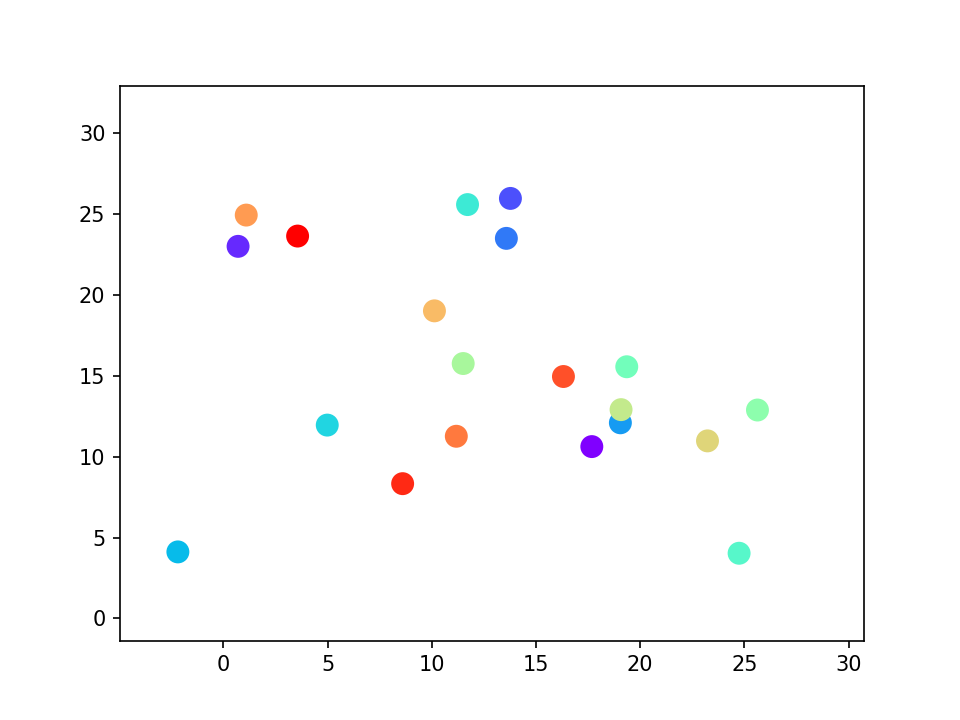

<IPython.core.display.Javascript object>


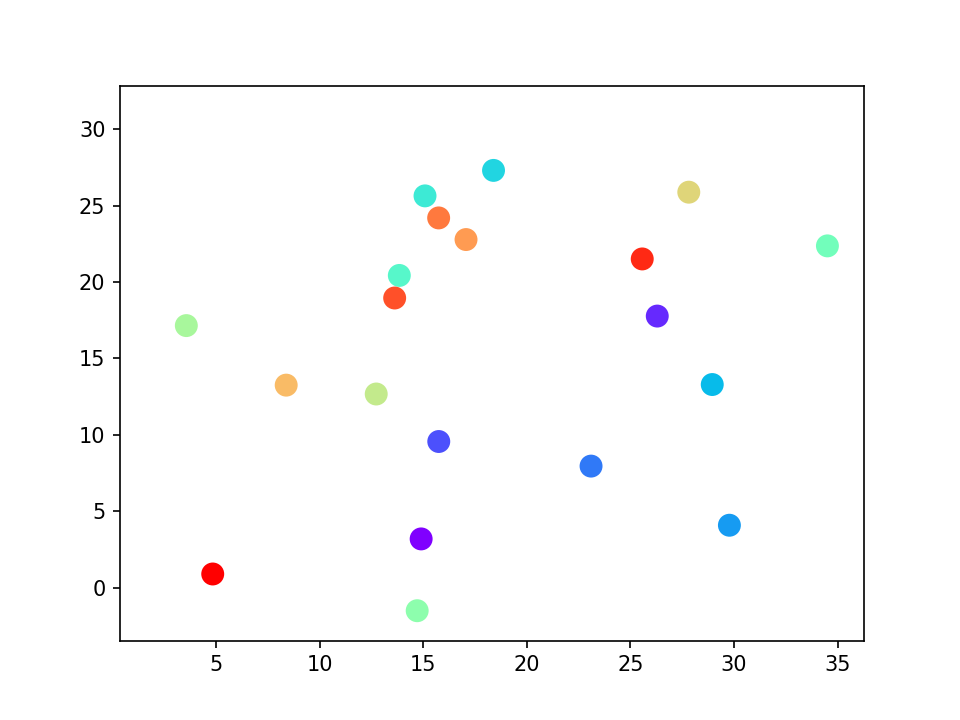

<IPython.core.display.Javascript object>


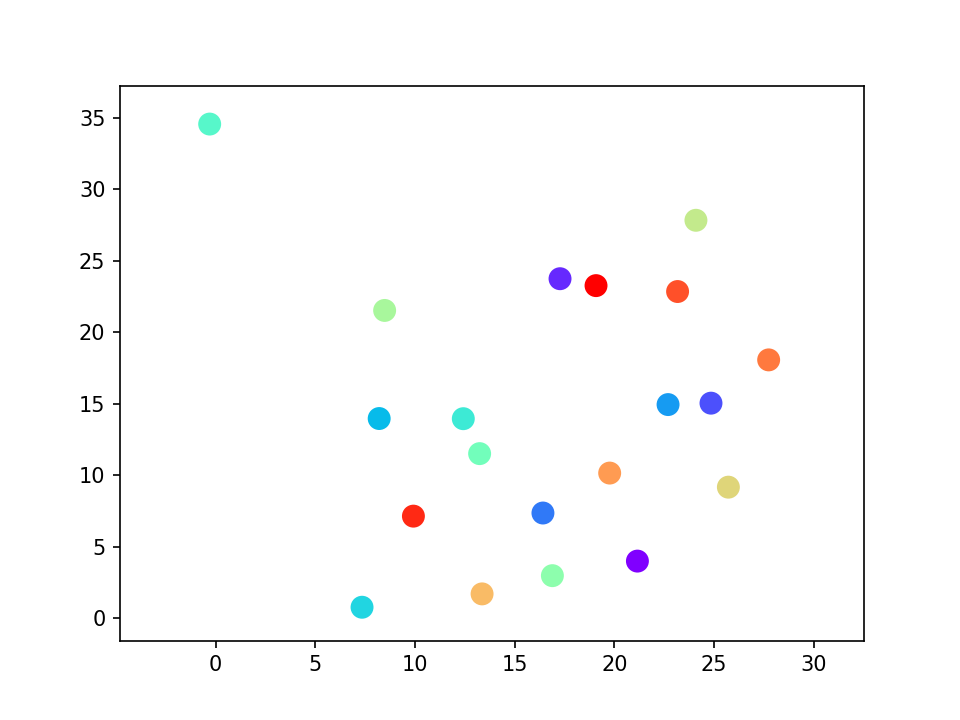

<IPython.core.display.Javascript object>


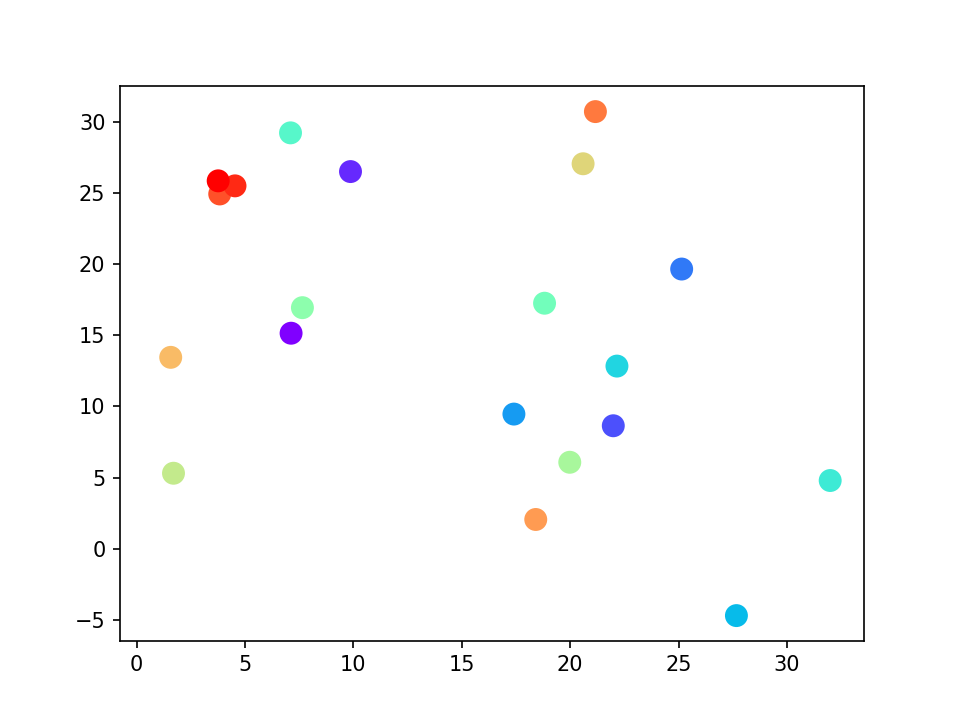

<IPython.core.display.Javascript object>


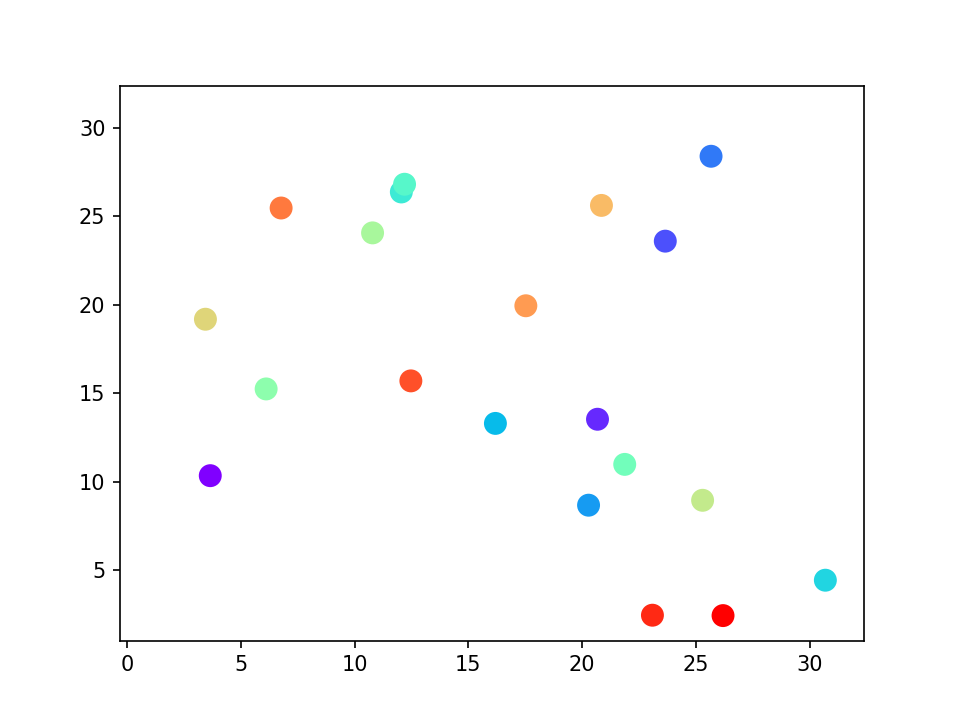

<IPython.core.display.Javascript object>


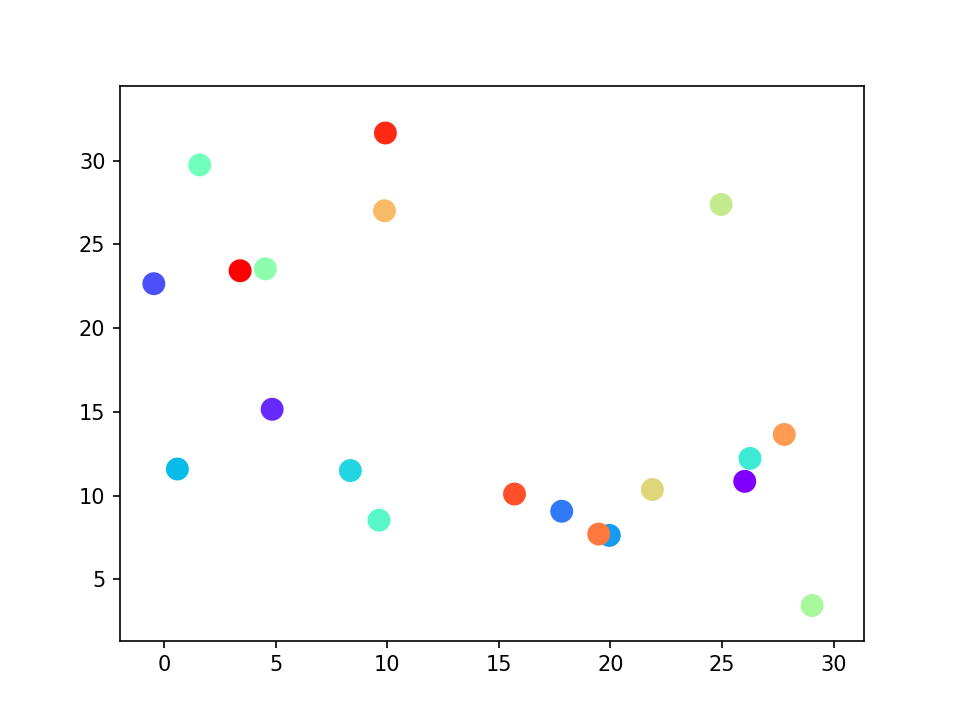

<IPython.core.display.Javascript object>


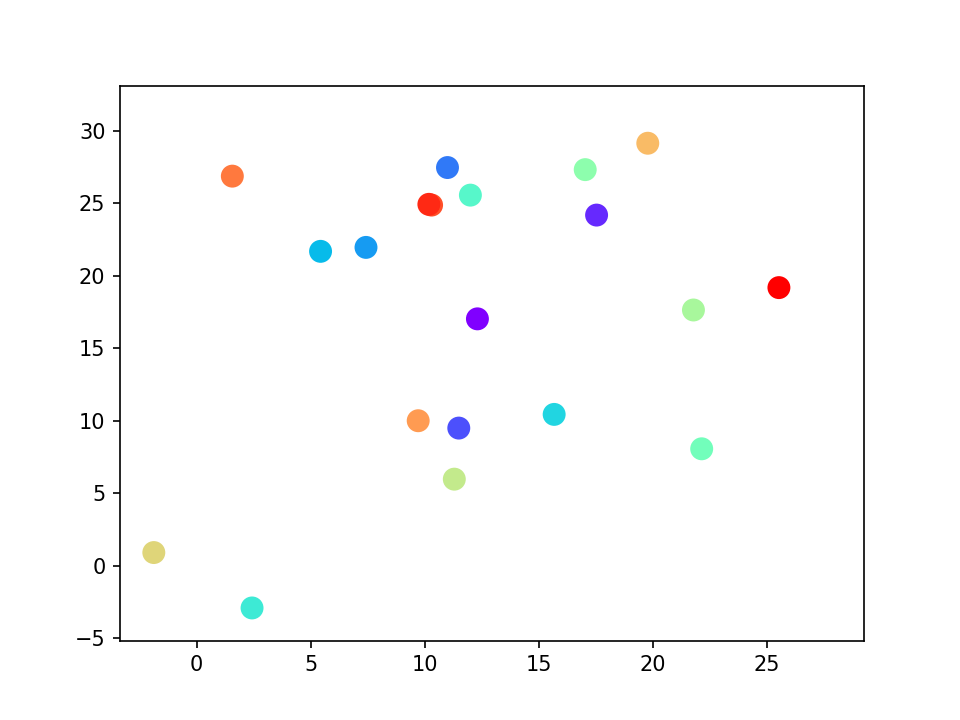

<IPython.core.display.Javascript object>


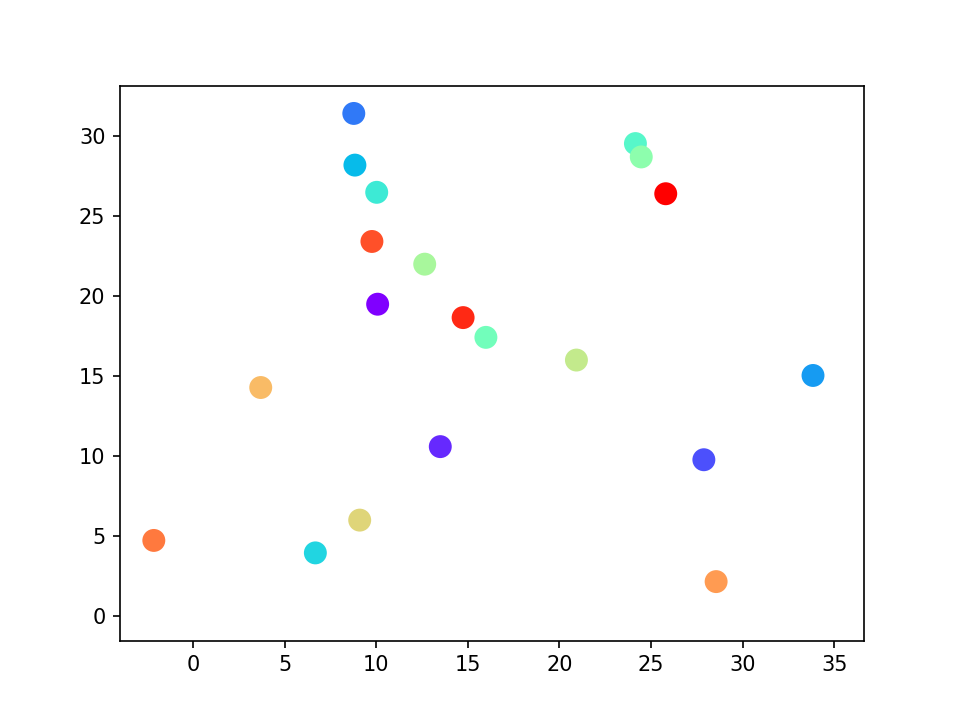

<IPython.core.display.Javascript object>


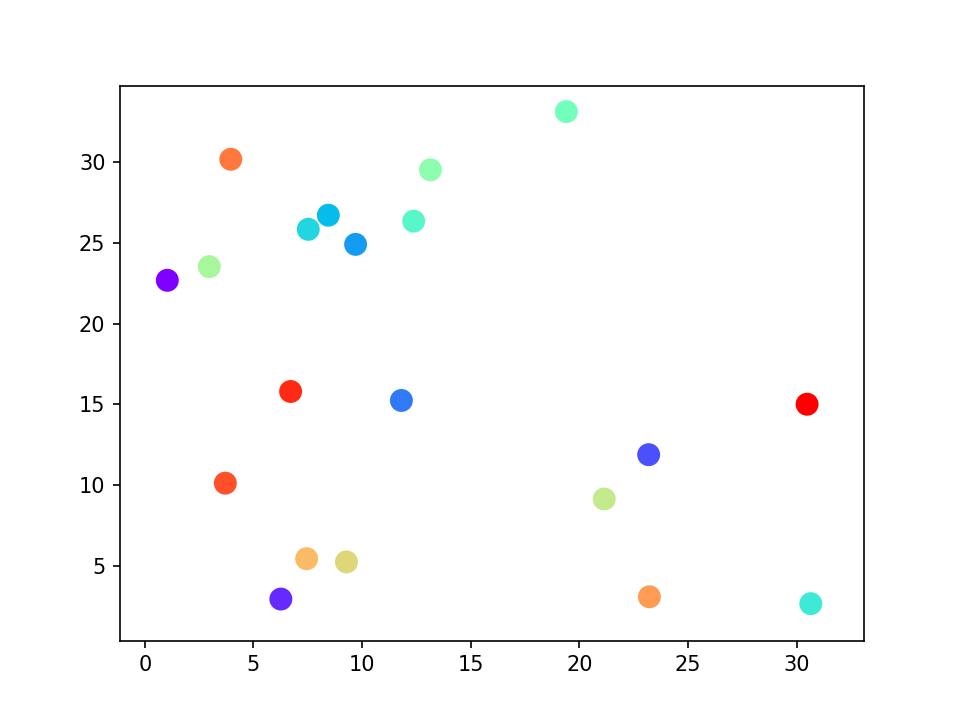

<IPython.core.display.Javascript object>


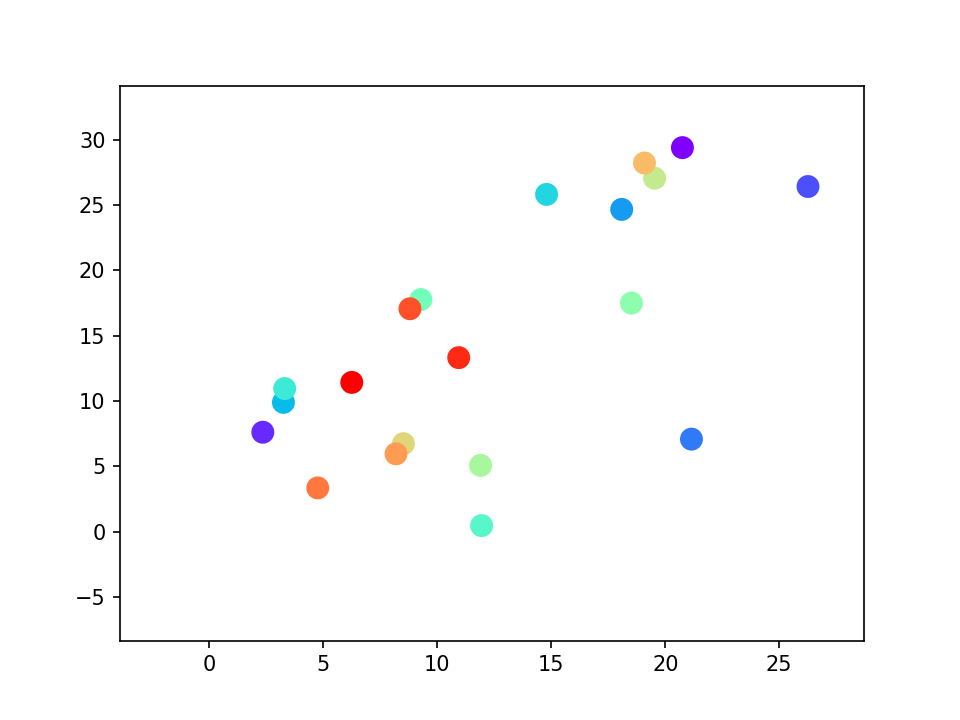

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib import cm
import matplotlib.animation as ani
import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

# Inputs/Parameters --------------------------------------------------------------------------

deltat = 1 # units: min
T = 20 # units: min
dmax = 2 # (assumed value) units: m
k = 1/dmax # decay rate
class_size=[30, 30] # units: m^2
num_people=20
po = 1 # max prob
a = 1 # units: m
proba_infection=0.05 # initial probability of infection in the room/area
probability_threshold = 0.2 # (assumed value)  the minimum threshold above which the person is marked to be infected
num_infected_per_seed = {} # Dictionary to capture the list of number of infected people per time_step per seed
num_of_seeds = 20 # Number of seeds the simulation must be run for


# Helper Functions ----------------------------------------------------------------------------

def rand_initialize(num_people, class_size):
        
    '''
    The function randomnly initializes positions for a number of people in an area of fixed square dimensions.
    A dictionary of the person's id (a natural number) with the corresponding initial position is returned.
    '''

    sp={}
    for i in range(num_people):
        sp[i] = []
        sp[i].append(np.array([random.sample(list(np.linspace(1, class_size, 2000)), 1)[0], random.sample(list(np.linspace(1, class_size, 2000)), 1)[0]]))
    return sp


def random_move(position, a):

    '''
    The function takes in 2 inputs - the initial position of the person, and the average step he/she takes while moving, 
    in a single time-step.
    It returns the new positions of the same person.
    '''

    x, y = position
    x = x + a*np.cos(2*np.pi*random.random())
    y = y + a*np.sin(2*np.pi*random.random())
    return x, y


def assign_infection(l, prob_infected):

    '''
    The function takes in the probability of getting infected and a list of ids (or names) of people as inputs 
    and returns a dictionary of random people assigned with infections according to a uniform probability passed.
    '''

    num_infected = int(prob_infected*len(l))
    form = {}
    infected = random.sample(l, k=num_infected)
    safe = []
    for i in range(len(l)):
        if l[i] not in infected:
            safe.append(l[i])
    for i in range(len(l)):
        form[l[i]] = []
    for i in infected:
        form[i].append('infected')
    for j in safe:
        form[j].append('safe')
    return form

def infected_list(infected_dict):

    '''
    The function takes in a dictionary of people infected and returns a list of their corresponding ids/names.
    '''

    inf = []
    for k in infected_dict:
        if infected_dict[k][0] == 'infected':
            inf.append(int(k))
    return inf

def prob(k, po, D):

    '''
    The function that captures the infection spreading in the community, depending on their relative positions.
    po: probability of getting infected at least possible distance (very close to 1)
    k: rate of decay of the probability with distance (=1/dmax)
    D: the distance between 2 people 
    '''

    return po*np.e**(-k*D)


# Simulation code ---------------------------------------------------------------------------------

for s in range(num_of_seeds): 
    random.seed(s)
    
    people = rand_initialize(num_people, class_size[0])
    names = [] # list of ids/names of people in the setting
    for i in people:
        names.append(i)
        
    initial_pos = []
    for i in people:
        initial_pos.append(np.array(people[i]).tolist()[0])

    positions = {} # a dictionary to capture the coordinates of each person at different time_steps
    status = {} # a dictionary that captures the initial status (infected/safe) of a person
    d = {} # a dictionary that holds the distance between the infected person and the other people in the room (redundancy is permitted)
    infec = [] # a list that captures all the infected people in different time steps of the same seed
    new_status = {} # the dictionary that captures the updated status (infected/safe) after each time_step
    infected = [] # a list to capture the proportion of people infected during each timestep
    probability_of_getting_infected = {} # dictionary to capture the probabilities of infection for each person after different time_steps according to the probability law assumed
    
    
    infected_dict = assign_infection(names, proba_infection)
    inf = infected_list(infected_dict)
    for t in range(0, T, deltat):
        positions[str(t+1)] = []
        status[str(t+1)] = []
    for t in range(0, T, deltat):
        for j in random.sample(list(people), len(people)): # select a person from the dictionary to be moved
            x, y = random_move(people[j][0], a) # random move
            positions[str(t+1)].append([x, y])
        # move with some proba - assumed to be uniform
            status[str(t+1)].append(infected_dict[j])
        for i in inf:
            for p in positions:
                d['person_id: ' + str(i) + ', ' + 'time_interval: ' + p] = []
                for j in positions[p]:
                      d['person_id: ' + str(i) + ', ' + 'time_interval: ' + p].append(round(np.sqrt((j[0] - positions[p][i-1][0])**2 + (j[1] - positions[p][i-1][1])**2), 3))
        for i in d:
            probability_of_getting_infected[i] = []
            for j in d[i]:
                probability_of_getting_infected[i].append(prob(k, po, j))

        list_status = [v for _, v in probability_of_getting_infected.items()]
        for i in range(int(len(list_status)/len(inf))):
            new_status[str(i+1)] = []
            for j in range(len(list_status[i])):
                try:
                    if list_status[i][j] > probability_threshold and list_status[i+T][j] > probability_threshold:
                        new_status[str(i+1)].append('infected')
                    else:
                        new_status[str(i+1)].append('safe')
                except:
                    pass
        status = new_status
        infected_dict = assign_infection(names, len(np.unique(inf))/len(names))
        inf = np.unique(inf + infected_list(infected_dict)).tolist()
        infected.append(len(inf)/len(people))
        infec.append(inf)
        num_infected_per_seed[s] = []
        for i in infec:
            num_infected_per_seed[s].append(len(i))

# Plotting the behavior ------------------------------------------------------------------------------
            
    points = np.array(initial_pos).reshape(2, -1)
    fig1 = plt.figure()
    ax = fig1.add_subplot()
    colors = cm.rainbow(np.linspace(0, 1, num_people))
    camera = Camera(fig1)
    for _ in range(T):
        points[0] += a * np.cos(2*np.pi*np.random.random((num_people, )))
        points[1] += a * np.sin(2*np.pi*np.random.random((num_people, )))
        plt.scatter(*points, c=colors, s=100)

        camera.snap()
    anim = camera.animate(blit=True)

#     Writer = ani.writers['ffmpeg']
#     writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#     anim.save('textmovie' + '- ' + str(s) + '.mp4', writer=writer)
            
            
            
            
            
            
            
        

    # The plots generated below are for each time_step under different seeds
    
#     names = [] # arbitrary list to keep track of people in the below generated plots    
#     for i in range(len(people)):
#         names.append('person' + ' ' + str(i))
    
#     for k in range(T):
#         infected_pos = [] # coordinates of infected people
#         for i in infec[k]:
#             infected_pos.append(positions[str(k+1)][i])
#         safe_pos = [ele for ele in positions[str(k+1)] if ele not in infected_pos] # coordinates of safe people
#         x_inf = []
#         y_inf = []
#         for i in infected_pos:
#             x_inf.append(i[0])
#             y_inf.append(i[1])
#         x_safe = []
#         y_safe = []
#         for i in safe_pos:
#             x_safe.append(i[0])
#             y_safe.append(i[1])
#         fig = plt.figure(figsize=(8,8))
#         plt.scatter(x_safe, y_safe, s = 50, label='safe')
#         plt.scatter(x_inf, y_inf, s = 200, label='infected')
#         plt.xlabel('x-coordinate of the place')
#         plt.ylabel('y-coordinate of the place')
#         plt.legend(loc='best')
#         for idx, pos in enumerate(positions[str(k+1)]):
#             plt.annotate(names[idx], 
#                          xy = tuple(pos),
#                          xytext = (-15, 15), ha = 'right', va = 'bottom',
#                          textcoords = 'offset points',
#                          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.3),
#                          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
#                         )
#             plt.title('seed: ' + str(s))


In [2]:
intermediate = {} # Dict to capture the number of infections in each timestep
avg_over_timesteps_final = {} 
std_over_timesteps_final = {}
for t in range(0, T, deltat):
    intermediate[t] = []
    for j in num_infected_per_seed:
        intermediate[t].append(np.mean(num_infected_per_seed[j][t]))
for t in range(0, T, deltat):
    avg_over_timesteps_final[t] = []
    std_over_timesteps_final[t] = []
    avg_over_timesteps_final[t].append(np.mean(intermediate[t]))
    std_over_timesteps_final[t].append(np.std(intermediate[t]))

In [3]:
avg = [x[0] for x in list(avg_over_timesteps_final.values())]
std = [y[0] for y in list(std_over_timesteps_final.values())]

<IPython.core.display.Javascript object>


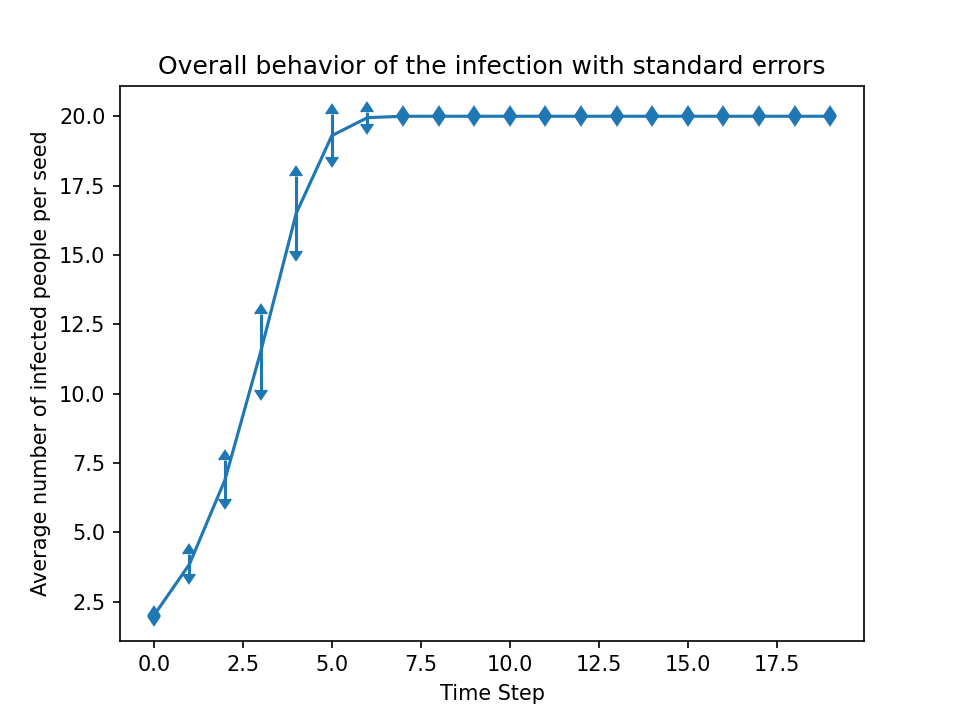

Text(0.5, 1.0, 'Overall behavior of the infection with standard errors')

In [4]:
# Plot of average infection numbers per seed with standard errors marked with the arrows
fig2 = plt.figure()
plt.errorbar(list(avg_over_timesteps_final.keys()), avg, yerr = std, uplims=10, lolims=10)
plt.ylabel('Average number of infected people per seed')
plt.xlabel('Time Step')
plt.title('Overall behavior of the infection with standard errors')

In [5]:
# A secondary function to give a rough estimate of number students to be accomodated in a stationary sitting (a classroom) following some norms

# Can we accomodate these many people in a place, assuming them to be almost stationary throughout.

def can_accomodate(place_size, dist_norm, air_space_class=[2, 3], air_space_people=1):
    '''
    place_size (list): [length, breadth]
    dist_norm: min_distance between people to be followed
    air_space_people: comfort+size..etc.
    air_space_class (list): class_room size not used [length, breadth]
    '''        
    return int(((place_size[0]-2*air_space_class[0])*(place_size[1]-2*air_space_class[1]))/((air_space_people/2 + dist_norm)**2))
can_accomodate(place_size=[30, 30], dist_norm=2)

99